In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
print(f"Loading dataset from: {url}")
df = pd.read_csv(url)

Loading dataset from: https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Separate features (X) and target (y - assuming last column)
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Use transform only on test set

In [9]:
# 2. Build the Regularized FNN Model
model = keras.Sequential([
    # Example for L1 REGULARIZATION
    keras.layers.Dense(64, activation='relu',
                 kernel_regularizer=keras.regularizers.l1(0.01),
                 input_shape=(X_train.shape[1],)), 

    # Example for DROPOUT
    keras.layers.Dropout(0.3),

    # Example for L2 REGULARIZATION
    keras.layers.Dense(32, activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.01)),
                 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 3. Compile the Model
model.compile(optimizer='adam',  loss='mse', metrics=['mae'])   

In [11]:
# 4. Train the Model
# Use EarlyStopping callback to prevent overfitting and save time 
# Example for EARLY STOPPING
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',  # Monitor validation loss
                              patience=10,         # Stop after 10 epochs with no improvement
                               restore_best_weights=True) # Keep the best model weights


# Verbose: Set to 0 for silent training, 1 for progress bar
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,          
                    batch_size=16,       
                    callbacks=[early_stopping])

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.7096 - mae: 0.5532 - val_loss: 1.3635 - val_mae: 0.4068
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3834 - mae: 0.4266 - val_loss: 1.2297 - val_mae: 0.3780
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2083 - mae: 0.3601 - val_loss: 1.1351 - val_mae: 0.3664
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1288 - mae: 0.3700 - val_loss: 1.0420 - val_mae: 0.3541
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0306 - mae: 0.3426 - val_loss: 0.9643 - val_mae: 0.3504
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9805 - mae: 0.3689 - val_loss: 0.8855 - val_mae: 0.3537
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8727 - mae: 0.3433 - val_loss: 0.8182 - val_mae: 0.3576
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8121 - mae: 0.3542 - val_loss: 0.7467 - val_mae: 0.3577
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.74

In [12]:
# 5. Evaluate the Model
y_pred = model.predict(X_test)

# Calculate performance metrics 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mae, mse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(0.3358237147331238, 0.1614782214164734)

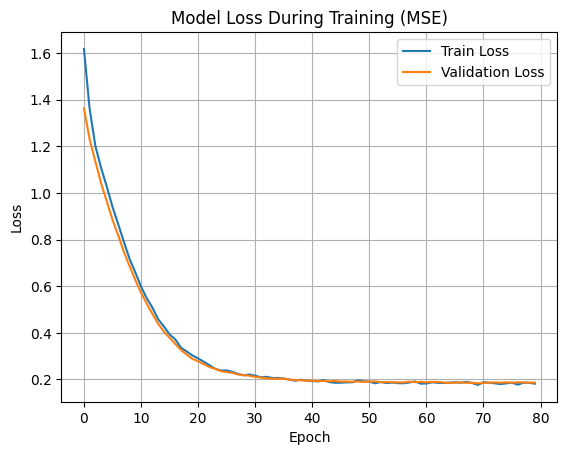

In [13]:
# 6. Plot Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training (MSE)')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.grid(True)
plt.show()